## Travel Expense Rejection Analysis (Flag 67)

### Dataset Description
The dataset consists of 500 entries simulating ServiceNow fm_expense_line table, which records various attributes of financial expenses. Key fields include 'number', 'opened_at', 'amount', 'state', 'short_description', 'ci', 'user', 'department', 'category', 'process_date', 'source_id', and 'type'. This table documents the flow of financial transactions by detailing the amount, departmental allocation, and the nature of each expense. Provides a clear view of organizational expenditures across different categories, highlighting both the timing and the approval state of each financial entry.

### Your Task
**Goal**: To identify and rectify the causes of high rejection rates in travel expenses to ensure that submissions  align with organizational policies.

**Role**: Expense Audit Analyst

**Difficulty**: 2 out of 5. This task requires key analysis of expense reports to detect commonalities in rejections.

**Category**: Finance Management


### Import Necessary Libraries
This cell imports all necessary libraries required for the analysis. This includes libraries for data manipulation, data visualization, and any specific utilities needed for the tasks. 

In [3]:
import argparse
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas import date_range

### Load Dataset
This cell loads the dataset to be analyzed. The data is stored in the from a CSV file, and is imported into a DataFrame. It involves specifying the path to the dataset, using pandas to read the file, and confirming its successful load by inspecting the first few table entries.

In [4]:
dataset_path = "csvs/flag-67.csv"
flag_data = pd.read_csv(dataset_path)
df = pd.read_csv(dataset_path)
flag_data.head()


,category,department,opened_at,source_id,type,number,processed_date,amount,state,user,short_description,ci
0,Assets,Customer Support,2024-02-28 23:30:00,MOW-21341062,NaN,EXP00000000,2024-03-05 20:18:58.865466754,5345,Processed,Marianne Earman,Procurement of new hardware asset,Dell Latitude 3410
1,Assets,Sales,2024-04-11 16:24:00,JCZ-14840476,NaN,EXP00000001,2024-04-26 15:59:06.170441179,8761,Processed,Carolina Kinlaw,Automated creation of new hardware asset,Dell OptiPlex 7070 Desktop
2,Services,Sales,2023-07-12 07:29:00,IYI-40671468,NaN,EXP00000002,2023-07-21 22:46:22.903623363,834,Processed,Lacy Hyten,Newly implemented cloud service,AWS EC2 Instance
3,Assets,Sales,2023-11-30 14:53:00,ZQT-96922333,NaN,EXP00000003,NaN,5109,Submitted,Howard Johnson,Automatically generated asset entry for hardwa...,Dell Latitude 7410
4,Assets,Customer Support,2023-09-13 08:47:00,QTZ-80951096,NaN,EXP00000004,2023-09-22 11:30:54.396673685,3371,Processed,Sue Haakinson,Addition of new hardware asset,Dell Latitude 6520



### **Question 1: How does the processing time of requests differ across departments for high-value items?**

#### Visualize processing time distribution for high-value requests across departments
This analysis focuses on the processing times of high-value items across different departments. By examining the variations in processing time distribution, we gain insight into which departments handle high-value requests faster or slower, potentially highlighting operational efficiencies or areas for improvement. Requests are filtered by high-value items, defined as those with amounts in the top quartile.

<ipython-input-5-af3cb4602293>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_value_data["processing_time"] = (


<Figure size 864x432 with 0 Axes>

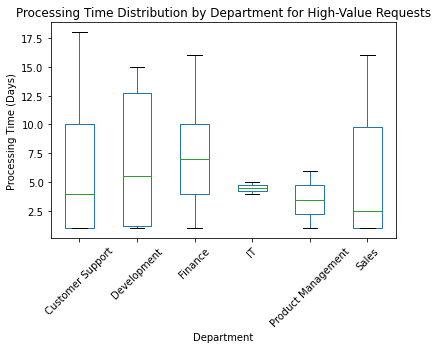

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Load data
file_path = "csvs/flag-67.csv"
data = pd.read_csv(file_path)

# Preprocess data
data["opened_at"] = pd.to_datetime(data["opened_at"])
data["processed_date"] = pd.to_datetime(data["processed_date"], errors="coerce")

# Filter for high-value items (top 25% of 'amount')
top_value_threshold = data["amount"].quantile(0.75)
high_value_data = data[data["amount"] >= top_value_threshold]

# Calculate processing time in days
high_value_data["processing_time"] = (
    high_value_data["processed_date"] - high_value_data["opened_at"]
).dt.days

# Drop rows with missing processing times
high_value_data = high_value_data.dropna(subset=["processing_time"])

# Plot processing time distribution by department
plt.figure(figsize=(12, 6))
high_value_data.boxplot(column="processing_time", by="department", grid=False)
plt.title("Processing Time Distribution by Department for High-Value Requests")
plt.suptitle("")  # Remove the automatic title from boxplot
plt.xlabel("Department")
plt.ylabel("Processing Time (Days)")
plt.xticks(rotation=45)
plt.show()

#### Generate JSON Description for the Insight

In [6]:
{
    "data_type": "distributional",
    "insight": "Processing times for high-value requests vary significantly across departments, with Customer Support showing the widest range in processing times.",
    "insight_value": {
        "description": "Customer Support has a high variability in processing time for high-value requests, ranging from 1 to 18 days, with a mean processing time of approximately 5.8 days. This variability may suggest a non-standardized approach or a higher volume of requests leading to differing priorities within this department."
    },
    "plot": {
        "plot_type": "boxplot",
        "title": "Processing Time Distribution by Department for High-Value Requests",
        "x_axis": {
            "name": "Department",
            "value": [
                "Customer Support",
                "Development",
                "Finance",
                "IT",
                "Product Management",
                "Sales",
            ],
            "description": "This axis represents departments across which high-value request processing times are distributed.",
        },
        "y_axis": {
            "name": "Processing Time (Days)",
            "value": "Range of processing times from the minimum to maximum observed for each department",
            "description": "This axis shows the number of days taken to process high-value requests, helping identify departments with potentially more efficient or delayed processing cycles.",
        },
        "description": "The boxplot reveals substantial variability in processing times, particularly within Customer Support, suggesting that high-value requests face different processing delays depending on the department.",
    },
    "question": "How does the processing time of requests differ across departments for high-value items?",
    "actionable_insight": "Customer Support's high variability in processing times indicates that improvements in process standardization or resource allocation could enhance efficiency for high-value requests. Departments with consistently shorter processing times, such as IT and Product Management, could serve as models for optimizing request handling across other departments.",
}

{'data_type': 'distributional',
 'insight': 'Processing times for high-value requests vary significantly across departments, with Customer Support showing the widest range in processing times.',
 'insight_value': {'description': 'Customer Support has a high variability in processing time for high-value requests, ranging from 1 to 18 days, with a mean processing time of approximately 5.8 days. This variability may suggest a non-standardized approach or a higher volume of requests leading to differing priorities within this department.'},
 'plot': {'plot_type': 'boxplot',
  'title': 'Processing Time Distribution by Department for High-Value Requests',
  'x_axis': {'name': 'Department',
   'value': ['Customer Support',
    'Development',
    'Finance',
    'IT',
    'Product Management',
    'Sales'],
   'description': 'This axis represents departments across which high-value request processing times are distributed.'},
  'y_axis': {'name': 'Processing Time (Days)',
   'value': 'Range of 

### **Question 2:  What is the distribution of Expense Reports by department?**

#### Number of Expense Reports by Category

This bar chart illustrates distribution of expense reports across  categories within organization. By visualizing these number of reports per category, this plot highlights which expense categories are most commonly reported and potentially which ones are under more scrutiny or utilized more frequently. 

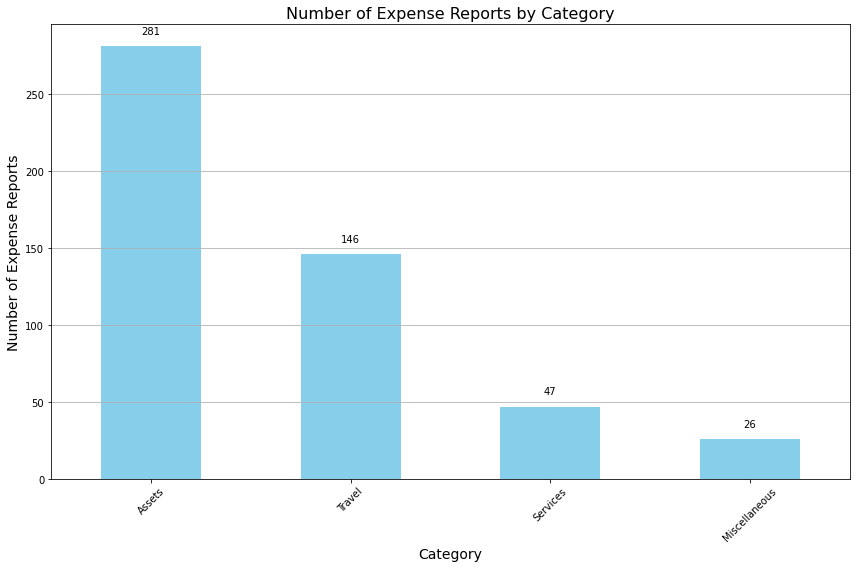

In [7]:
import matplotlib.pyplot as plt

# Count the number of expense reports per department
department_counts = flag_data['category'].value_counts()

# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))
department_counts.plot(kind='bar', color='skyblue', ax=ax)

# Add titles and labels
ax.set_title('Number of Expense Reports by Category', fontsize=16)
ax.set_xlabel('Category', fontsize=14)
ax.set_ylabel('Number of Expense Reports', fontsize=14)

# Show grid
ax.grid(axis='y')  # Only horizontal grid lines for readability

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to not cut off labels

# Adding numeric labels on top of the bars for clarity
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 10), textcoords='offset points')

# Show the plot
plt.show()

#### Generate JSON Description for the Insight

In [8]:
{
    "data_type": "descriptive",
    "insight": "There is a variable distribution of Expense Reports across categories",
    "insight_value": {
        "description": "While Travel expenses are frequently rejected, they are not the most submitted category. Assets category dominates the submission volume."
    },
    "plot": {
        "plot_type": "bar",
        "title": "Distribution of Expense Reports by Category",
        "x_axis": {
            "name": "Expense Category",
            "value": ["Assets", "Travel", "Services", "Miscellaneous"],
            "description": "This axis categorizes expenses into different types, including Assets, Travel, Services, and Miscellaneous."
        },
        "y_axis": {
            "name": "Number of Expense Reports",
            "value": {
                "Assets": "281",
                "Travel": "146",
                "Services": "47",
                "Miscellaneous": "26"
            },
            "description": "This axis displays the number of expense reports submitted within each category, indicating a higher volume of submissions for Assets than for other categories."
        },
        "description": "The bar chart illustrates that the Assets category has the highest number of submissions at 281, followed by Travel with 146, Services with 47, and Miscellaneous with 26. This distribution shows that despite high rejection rates, the Travel category does not lead in submission frequency but remains significant."
    },
    "question": "What is the distribution of Expense Reports by Category?",
    "actionable_insight": "Understanding that Assets lead in the number of submissions, it's important to closely monitor and manage this category to ensure compliance and proper allocation of resources. For the Travel category, which has a high rejection rate but significant submission volume, refining submission guidelines and improving training on how to correctly file Travel expenses could help reduce rejections and streamline processing. This could involve clarifying allowable expenses within the Travel category and ensuring that all employees are aware of and understand these policies."
}


{'data_type': 'descriptive',
 'insight': 'There is a variable distribution of Expense Reports across categories',
 'insight_value': {'description': 'While Travel expenses are frequently rejected, they are not the most submitted category. Assets category dominates the submission volume.'},
 'plot': {'plot_type': 'bar',
  'title': 'Distribution of Expense Reports by Category',
  'x_axis': {'name': 'Expense Category',
   'value': ['Assets', 'Travel', 'Services', 'Miscellaneous'],
   'description': 'This axis categorizes expenses into different types, including Assets, Travel, Services, and Miscellaneous.'},
  'y_axis': {'name': 'Number of Expense Reports',
   'value': {'Assets': '281',
    'Travel': '146',
    'Services': '47',
    'Miscellaneous': '26'},
   'description': 'This axis displays the number of expense reports submitted within each category, indicating a higher volume of submissions for Assets than for other categories.'},
  'description': 'The bar chart illustrates that the A

### **Question 3: Are the guidelines for submitting travel expenses more complex compared to other categories?**


To adequately address this question, additional data or insights from experts who are familiar with the company's expense reporting policies are necessary. It is recommended that the organization conduct a thorough review of the written guidelines for each expense category or consult with policy managers. Gathering qualitative feedback from employees on their experiences with submitting expenses in various categories could also provide valuable insights. Implementing a survey or a series of focus groups to discuss the challenges and perceptions related to expense submission guidelines could uncover the complexity levels and any discrepancies between categories. This approach will not only clarify whether travel expense guidelines are indeed more complex but also help identify specific areas for simplification and improvement.

### **Question 4: What training or resources are currently available to employees submitting travel expenses?**


Insufficient Data on Training or Resources for Travel Expense Submission

Given the high rejection rates in the Travel category and the absence of data on supportive measures, it is predictive to assume that existing resources or training may not be adequately addressing the needs of employees. This situation, if not improved, could lead to continued or increased rejections. It is recommended that the organization should proactively enhance its training programs and resources related to travel expenses. This could involve updating training modules to reflect current policies, creating more detailed guides or FAQs specifically for travel expenses, or implementing regular review sessions and feedback mechanisms to ensure that employees are well-informed and supported in making compliant submissions. Additionally, assessing the current support system through employee surveys or consultations could identify gaps and opportunities for improvement, potentially reducing the rate of expense rejections significantly.

### Summary of Findings (Flag 67):

1. **Processing Time Variability**: From Question 1, it was found that processing times for high-value requests vary significantly across departments, with Customer Support showing the widest range. This suggests potential inefficiencies or a lack of standardized processes within this department.

2. **Expense Report Distribution**: Question 2 revealed that the Assets category dominates the number of expense report submissions, while Travel, despite having a high rejection rate, is not the most submitted category. This indicates a need for focused management and compliance monitoring in the Assets category.

3. **Complexity of Travel Expense Guidelines**: Question 3 highlighted the potential complexity of travel expense guidelines compared to other categories. This suggests a need for a thorough review of the guidelines and possibly simplifying them to reduce rejection rates and improve compliance.